In [1]:
# libraries
import torch
from torchvision import transforms, datasets
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
from IPython.display import Image as DisplayImage 
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# train on GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.get_device_name()

'GeForce MX150'

In [3]:
# apply some transformations to images
batch_size = 4
transformation = transforms.Compose([transforms.RandomResizedCrop(300), transforms.ToTensor()])
train_data = datasets.ImageFolder('PETIMG/train', transform=transformation)
test_data = datasets.ImageFolder('PETIMG/test', transform=transformation)
# load datasets
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=True, batch_size=batch_size)
print('Number of training batches:', len(train_loader))

Number of training batches: 8194


In [4]:
# main ConvNet structures
class Cat_v_Dog(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = torch.nn.Sequential(
            torch.nn.Conv2d(3, 16, 3),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, 3),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.25),
            torch.nn.MaxPool2d(2),
            torch.nn.Conv2d(32, 64, 3),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.Conv2d(64, 128, 3),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.Conv2d(128, 256, 3),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            torch.nn.Conv2d(256, 32, 3),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.Dropout(p=0.25),
            torch.nn.MaxPool2d(2),
        )
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Linear(156800, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 2),
            torch.nn.LogSigmoid(),
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [5]:
# initialise model and print model summary
model = Cat_v_Dog()
model.to(device)

Cat_v_Dog(
  (conv_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout(p=0.25, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (15): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (16): ReLU()
    (

In [6]:
# define loss fucntion and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.00001)

In [7]:
def train(epochs, model, force_stop=False):
    model.train()
    start = time.time()
    losses = []
    for epoch in range(epochs):
        print(f'Started training epoch {epoch+1} of {epochs}.')
        epoch_loss = 0
        for idx, (images, labels) in tqdm(enumerate(iter(train_loader))):
            images, labels = images.to(device), labels.to(device)
            
            prediction = model(images)
            loss = criterion(prediction, labels)
            
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
            
            epoch_loss += loss.item()
            # print(f'Epoch: {epoch}, Index: {idx}, Remaining: {remaining}, Loss:', loss.item())
            if force_stop and idx == 20:
                break
        elapsed_time = int(time.time() - start)
        elapsed_mins = int(elapsed_time/60)
        elapsed_secs = int(elapsed_time - elapsed_mins * 60)
        print(f'Epoch {epoch + 1} complete. Epoch loss: {epoch_loss}. Time elapsed: {elapsed_mins} minutes, {elapsed_secs} seconds')
        losses.append(epoch_loss)
    end = time.time()
    total_duration = end - start
    total_mins = int(total_duration/60)
    total_secs = int(total_duration - 60 * total_mins)
    print(f'Training complete. Time elapsed: {total_mins} minutes, {total_secs} seconds')
    plt.figure(figsize=(16, 8))
    xaxis = [i+1 for i in range(epochs)]
    plt.plot(xaxis, losses)
    plt.title('Loss over epochs')
    plt.show()

0it [00:00, ?it/s]

Started training epoch 1 of 12.


2337it [18:12,  2.16it/s]C:\Users\cngzl\.conda\envs\pytorch\lib\site-packages\PIL\TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\cngzl\.conda\envs\pytorch\lib\site-packages\PIL\TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\cngzl\.conda\envs\pytorch\lib\site-packages\PIL\TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\cngzl\.conda\envs\pytorch\lib\site-packages\PIL\TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\cngzl\.conda\envs\pytorch\lib\site-packages\PIL\TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 

Epoch 1 complete. Epoch loss: 5244.97521841526. Time elapsed: 133 minutes, 46 seconds
Started training epoch 2 of 12.


8194it [1:26:30,  1.58it/s]
0it [00:00, ?it/s]

Epoch 2 complete. Epoch loss: 4887.993726968765. Time elapsed: 220 minutes, 16 seconds
Started training epoch 3 of 12.


8194it [1:30:50,  1.50it/s]
0it [00:00, ?it/s]

Epoch 3 complete. Epoch loss: 4744.000362992287. Time elapsed: 311 minutes, 7 seconds
Started training epoch 4 of 12.


8194it [1:33:03,  1.47it/s]
0it [00:00, ?it/s]

Epoch 4 complete. Epoch loss: 4630.702503919601. Time elapsed: 404 minutes, 11 seconds
Started training epoch 5 of 12.


8194it [1:32:45,  1.47it/s]
0it [00:00, ?it/s]

Epoch 5 complete. Epoch loss: 4474.7741218954325. Time elapsed: 496 minutes, 56 seconds
Started training epoch 6 of 12.


8194it [1:33:00,  1.47it/s]
0it [00:00, ?it/s]

Epoch 6 complete. Epoch loss: 4433.126213625073. Time elapsed: 589 minutes, 57 seconds
Started training epoch 7 of 12.


8194it [1:13:18,  1.86it/s]
0it [00:00, ?it/s]

Epoch 7 complete. Epoch loss: 4311.137427400798. Time elapsed: 663 minutes, 15 seconds
Started training epoch 8 of 12.


8194it [55:41,  2.45it/s]
0it [00:00, ?it/s]

Epoch 8 complete. Epoch loss: 4267.601078547537. Time elapsed: 718 minutes, 57 seconds
Started training epoch 9 of 12.


8194it [55:38,  2.45it/s]
0it [00:00, ?it/s]

Epoch 9 complete. Epoch loss: 4199.958606056869. Time elapsed: 774 minutes, 35 seconds
Started training epoch 10 of 12.


8194it [55:39,  2.45it/s]
0it [00:00, ?it/s]

Epoch 10 complete. Epoch loss: 4127.791601952165. Time elapsed: 830 minutes, 15 seconds
Started training epoch 11 of 12.


8194it [55:31,  2.46it/s]
0it [00:00, ?it/s]

Epoch 11 complete. Epoch loss: 4030.9048368409276. Time elapsed: 885 minutes, 47 seconds
Started training epoch 12 of 12.


8194it [55:32,  2.46it/s]


Epoch 12 complete. Epoch loss: 4014.8816589191556. Time elapsed: 941 minutes, 20 seconds
Training complete. Time elapsed: 941 minutes, 20 seconds


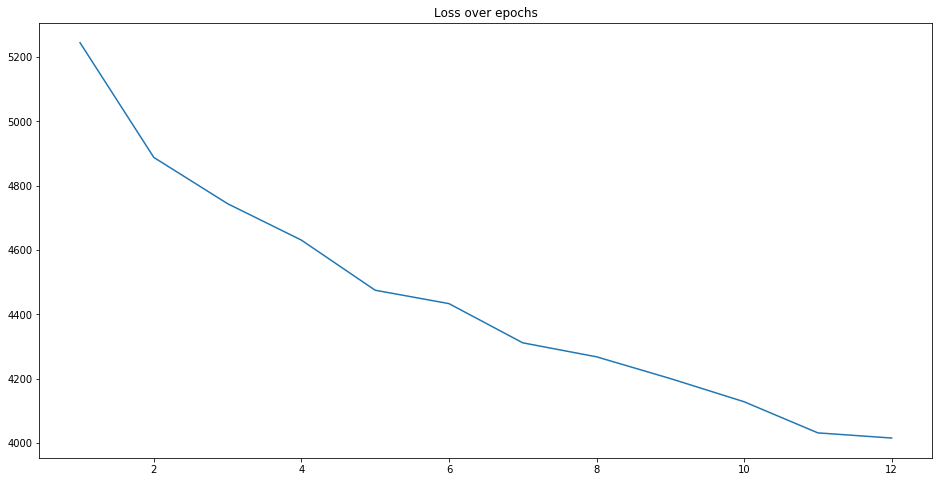

In [8]:
train(12, model, force_stop=False)

In [16]:
def test(dataloader, model, batch_size, force_stop=False):
    model.eval()
    num_example = len(dataloader)
    num_correct = 0
    print(f'Test dataset length: {num_example}')

    for images, labels in tqdm(iter(dataloader)):
        images, labels = images.to(device), labels.to(device)
        images, labels = images.float(), labels.float()

        prediction = model(images)
        prediction = torch.max(prediction, axis=1)[1]
        
        num_correct += int(sum(prediction == labels))
        
        if force_stop:
            break

    accuracy = num_correct / (num_example*batch_size) * 100
    print("Test Accuracy: {}".format(accuracy))

In [18]:
test(test_loader, model, batch_size)

  0%|▏                                                                                 | 1/500 [00:00<01:07,  7.43it/s]

Test dataset length: 500


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:18<00:00,  6.33it/s]

Test Accuracy: 74.75


In [9]:
# getting information on trained model
print('Model state_dict:')
for param_tensor in model.state_dict():
    print(param_tensor, '\t', model.state_dict()[param_tensor].size())
print('Optimiser state_dict:')
for var_name in optimiser.state_dict():
    print(var_name, '\t', optimiser.state_dict()[var_name])
def save_model(model):
    torch.save(model.state_dict(), 'cat_v_dog_model_new.pth')

Model state_dict:
conv_layers.0.weight 	 torch.Size([16, 3, 3, 3])
conv_layers.0.bias 	 torch.Size([16])
conv_layers.1.weight 	 torch.Size([16])
conv_layers.1.bias 	 torch.Size([16])
conv_layers.1.running_mean 	 torch.Size([16])
conv_layers.1.running_var 	 torch.Size([16])
conv_layers.1.num_batches_tracked 	 torch.Size([])
conv_layers.3.weight 	 torch.Size([32, 16, 3, 3])
conv_layers.3.bias 	 torch.Size([32])
conv_layers.4.weight 	 torch.Size([32])
conv_layers.4.bias 	 torch.Size([32])
conv_layers.4.running_mean 	 torch.Size([32])
conv_layers.4.running_var 	 torch.Size([32])
conv_layers.4.num_batches_tracked 	 torch.Size([])
conv_layers.8.weight 	 torch.Size([64, 32, 3, 3])
conv_layers.8.bias 	 torch.Size([64])
conv_layers.9.weight 	 torch.Size([64])
conv_layers.9.bias 	 torch.Size([64])
conv_layers.9.running_mean 	 torch.Size([64])
conv_layers.9.running_var 	 torch.Size([64])
conv_layers.9.num_batches_tracked 	 torch.Size([])
conv_layers.11.weight 	 torch.Size([128, 64, 3, 3])
conv_la

In [10]:
# saving model
save_model(model)

In [8]:
# loading model
model.load_state_dict(torch.load('cat_v_dog_model.pth'))

<All keys matched successfully>

In [9]:
# make predictions on some images using trained model
def image_loader(path):
    image = Image.open(path)
    left = image.size[0] / 2 - 150
    right = image.size[0] / 2 + 150
    up = image.size[1] / 2 + 150
    down = image.size[1] / 2 - 150
    image = image.crop((left, down, right, up))
    np_image = np.array(image)/255
    np_image = np_image.transpose((2, 0, 1))
    tensor_image = torch.from_numpy(np_image).type(torch.cuda.FloatTensor)
    return tensor_image

Processing image: './PETIMG/excess/Dog/3543.jpg'
Class: Dog Confidence: 0.9947722628799043
Class: Cat Confidence: 0.005227737120095694


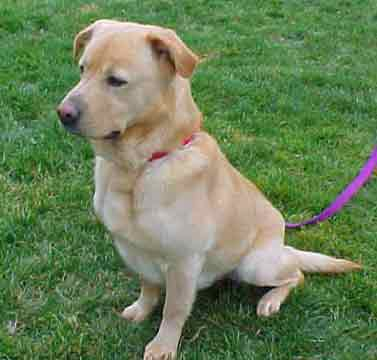

In [22]:
# test on a random picture, not in training or test sets
img_path = './PETIMG/excess/Dog/3543.jpg'
image = image_loader(img_path)
print('Processing image:', f"'{img_path}'")
image = image.unsqueeze(0)

prediction = model(image)
probabilities = torch.exp(prediction)
top_prob, top_idx = probabilities.topk(2)
# print(probabilities.topk(2))
top_probabilities = top_prob.detach().type(torch.FloatTensor).numpy().tolist()[0]
top_indices = top_idx.detach().type(torch.FloatTensor).numpy().tolist()[0]
psum = top_probabilities[0] + top_probabilities[1]
result_interpreter = dict([
        ('0.0', 'Cat'),
        ('1.0', 'Dog')])
print('Class:', result_interpreter[str(top_indices[0])],
      'Confidence:', str(top_probabilities[0] / psum))
print('Class:', result_interpreter[str(top_indices[1])],
      'Confidence:', str(top_probabilities[1] / psum))
DisplayImage(img_path)